In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [3]:
electron_dataframe = pd.read_csv("/kaggle/input/cern-electron-collision-data/dielectron.csv")
proton_dataframe = pd.read_csv("/kaggle/input/multijet-primary-dataset/MultiJetRun2010B.csv")
raw_data_electron = electron_dataframe.values
raw_data_proton = proton_dataframe.values

In [36]:
electron_dataframe.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [37]:
proton_dataframe.head()

,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nJets,nBJets
0,148029,388,302318745,215.553,0.031977,136.7100,-109.893,-54.03420,-58.9032,142.1790,70.0254,41.12250,-116.5130,203.666,18.31100,2,0
1,148029,388,302323641,155.437,0.042157,83.3865,81.150,6.88361,-12.9688,73.9025,-72.2472,11.88350,3.0899,154.659,14.77470,2,0
2,148029,388,302336217,400.563,0.026938,253.1840,139.902,102.64000,-101.9350,535.5510,-110.3790,-89.09290,-516.1790,343.280,25.22110,3,0
3,148029,388,302382289,286.245,0.094192,175.4860,-156.024,-62.95350,-47.7434,112.8510,89.0843,3.45025,67.9007,257.397,46.02880,2,0
4,148029,388,302403873,204.514,0.018804,833.7950,100.410,-16.65900,-827.4980,445.6120,-91.1991,15.55830,-390.1440,269.492,8.11345,3,0


In [6]:
# The last element contains the labels
labels_electron = raw_data_electron[:, -1]

# The other data points are the electrocadriogram data
data_electron = raw_data_electron[:, 0:-1]

electron_train_data, electron_test_data, electron_train_labels, electron_test_labels = train_test_split(
    data_electron, labels_electron, test_size=0.2, random_state=21
)

#############################################################################

# The last element contains the labels
labels_proton = raw_data_proton[:, -1]

# The other data points are the electrocadriogram data
data_proton = raw_data_proton[:, 0:-1]

proton_train_data, proton_test_data, proton_train_labels, proton_test_labels = train_test_split(
    data_proton, labels_proton, test_size=0.2, random_state=21
)

In [7]:
electron_min_val = tf.reduce_min(electron_train_data)
electron_max_val = tf.reduce_max(electron_train_data)

electron_train_data = (electron_train_data - electron_min_val) / (electron_max_val - electron_min_val)
electron_test_data = (electron_test_data - electron_min_val) / (electron_max_val - electron_min_val)

electron_train_data = tf.cast(electron_train_data, tf.float32)
electron_test_data = tf.cast(electron_test_data, tf.float32)

################################################################################

proton_min_val = tf.reduce_min(proton_train_data)
proton_max_val = tf.reduce_max(proton_train_data)

proton_train_data = (proton_train_data - proton_min_val) / (proton_max_val - proton_min_val)
proton_test_data = (proton_test_data - proton_min_val) / (proton_max_val - proton_min_val)

proton_train_data = tf.cast(proton_train_data, tf.float32)
proton_test_data = tf.cast(proton_test_data, tf.float32)

In [8]:
electron_train_labels = electron_train_labels.astype(bool)
electron_test_labels = electron_test_labels.astype(bool)

electron_normal_train_data = electron_train_data[electron_train_labels]
electron_normal_test_data = electron_test_data[electron_test_labels]

electron_anomalous_train_data = electron_train_data[~electron_train_labels]
electron_anomalous_test_data = electron_test_data[~electron_test_labels]

###############################################################################

proton_train_labels = proton_train_labels.astype(bool)
proton_test_labels = proton_test_labels.astype(bool)

proton_normal_train_data = proton_train_data[proton_train_labels]
proton_normal_test_data = proton_test_data[proton_test_labels]

proton_anomalous_train_data = proton_train_data[~proton_train_labels]
proton_anomalous_test_data = proton_test_data[~proton_test_labels]

In [9]:
electron_normal_train_data

<tf.Tensor: shape=(80000, 18), dtype=float32, numpy=
array([[8.2336424e-05, 6.4237460e-02, 4.7993802e-07, ..., 4.6833242e-07,
        4.6979005e-07, 4.7005599e-07],
       [8.2503910e-05, 2.3013495e-01, 4.7746681e-07, ..., 4.7083279e-07,
        4.6870900e-07, 4.6893945e-07],
       [8.2503910e-05, 1.5419719e-01, 4.7149831e-07, ..., 4.6822495e-07,
        4.6886530e-07, 4.7005599e-07],
       ...,
       [8.3053805e-05, 1.7637040e-01, 4.7189914e-07, ..., 4.6975686e-07,
        4.7021922e-07, 4.6893945e-07],
       [8.3053805e-05, 7.0774920e-02, 4.7067715e-07, ..., 4.6823629e-07,
        4.7088542e-07, 4.7005599e-07],
       [8.3052131e-05, 1.0342055e-01, 5.0895022e-07, ..., 4.7067368e-07,
        4.6823081e-07, 4.6893945e-07]], dtype=float32)>

In [10]:
electron_test_data

<tf.Tensor: shape=(20000, 18), dtype=float32, numpy=
array([[8.2598817e-05, 7.3594905e-02, 4.7240096e-07, ..., 4.7068238e-07,
        4.6916799e-07, 4.7005599e-07],
       [8.3752755e-05, 4.6119776e-01, 5.3217298e-07, ..., 4.6985500e-07,
        4.6864341e-07, 4.6893945e-07],
       [8.3752755e-05, 6.2108666e-01, 5.0080297e-07, ..., 4.7022820e-07,
        4.7008643e-07, 4.6893945e-07],
       ...,
       [8.3110746e-05, 1.4950080e-01, 4.8018160e-07, ..., 4.6831170e-07,
        4.7076563e-07, 4.6893945e-07],
       [8.3657855e-05, 1.7135334e-01, 5.5655710e-07, ..., 4.6825781e-07,
        4.7057938e-07, 4.6893945e-07],
       [8.3752755e-05, 3.3109614e-01, 5.4839853e-07, ..., 4.7055704e-07,
        4.7083438e-07, 4.7005599e-07]], dtype=float32)>

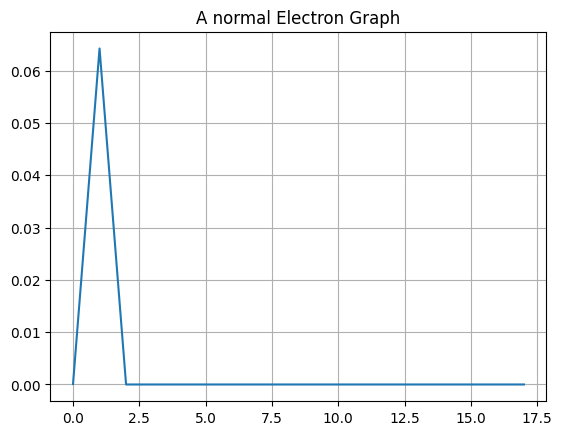

In [11]:
plt.grid()
plt.plot(np.arange(18), electron_normal_train_data[0])
plt.title("A normal Electron Graph")
plt.show()

In [12]:
proton_normal_train_data

<tf.Tensor: shape=(880, 16), dtype=float32, numpy=
array([[8.8643057e-05, 1.6590589e-06, 5.7317144e-01, ..., 1.1817409e-06,
        1.0787758e-06, 1.0785394e-06],
       [8.7966859e-05, 1.3062861e-06, 1.7866360e-01, ..., 1.2154680e-06,
        1.0796816e-06, 1.0797133e-06],
       [8.8643057e-05, 1.6561239e-06, 5.7018524e-01, ..., 1.2601873e-06,
        1.0862270e-06, 1.0791264e-06],
       ...,
       [8.8643057e-05, 1.6561239e-06, 5.6972414e-01, ..., 1.2110235e-06,
        1.0869625e-06, 1.0785394e-06],
       [8.8643057e-05, 1.6625806e-06, 5.7679749e-01, ..., 1.1906583e-06,
        1.0836681e-06, 1.0785394e-06],
       [8.8643057e-05, 1.6555369e-06, 5.6925696e-01, ..., 1.2103061e-06,
        1.0944042e-06, 1.0791264e-06]], dtype=float32)>

In [13]:
proton_test_data

<tf.Tensor: shape=(4346, 16), dtype=float32, numpy=
array([[8.7906403e-05, 1.3485484e-06, 2.9223174e-01, ..., 1.1715639e-06,
        1.0850395e-06, 1.0785394e-06],
       [8.8643057e-05, 1.6590589e-06, 5.7282448e-01, ..., 1.1762874e-06,
        1.0825191e-06, 1.0785394e-06],
       [8.8643057e-05, 1.6590589e-06, 5.7283372e-01, ..., 1.1915334e-06,
        1.0793418e-06, 1.0791264e-06],
       ...,
       [8.7906403e-05, 1.3503094e-06, 2.9444242e-01, ..., 1.1934517e-06,
        1.0900749e-06, 1.0785394e-06],
       [8.8643057e-05, 2.1356834e-06, 9.9921077e-01, ..., 1.2363380e-06,
        1.0852949e-06, 1.0791264e-06],
       [8.8643057e-05, 1.6637546e-06, 5.7757032e-01, ..., 1.2562276e-06,
        1.0956013e-06, 1.0785394e-06]], dtype=float32)>

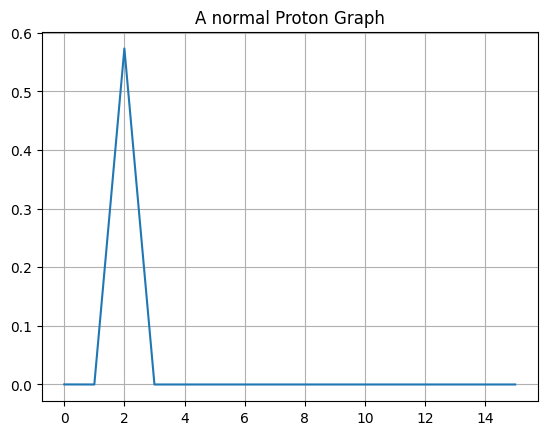

In [14]:
plt.grid()
plt.plot(np.arange(16), proton_normal_train_data[0])
plt.title("A normal Proton Graph")
plt.show()

In [15]:
class AnomalyDetectorElectron(Model):
    def __init__(self):
        super(AnomalyDetectorElectron, self).__init__()
        
        self.encoder = tf.keras.Sequential([
            layers.Dense(32, activation = "relu"),
            layers.Dense(16, activation = "relu"),
            layers.Dense(8, activation = "relu"),
        ])
        
        self.decoder = tf.keras.Sequential([
            layers.Dense(16, activation = "relu"),
            layers.Dense(32, activation = "relu"),
            layers.Dense(18, activation = "sigmoid")
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder_electron = AnomalyDetectorElectron()

##############################################################################

class AnomalyDetectorProton(Model):
    def __init__(self):
        super(AnomalyDetectorProton, self).__init__()
        
        self.encoder = tf.keras.Sequential([
            layers.Dense(32, activation = "relu"),
            layers.Dense(16, activation = "relu"),
            layers.Dense(8, activation = "relu"),
        ])
        
        self.decoder = tf.keras.Sequential([
            layers.Dense(16, activation = "relu"),
            layers.Dense(32, activation = "relu"),
            layers.Dense(16, activation = "sigmoid")
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder_proton = AnomalyDetectorProton()

In [16]:
autoencoder_electron.compile(optimizer = "adam", loss = "mae")
autoencoder_proton.compile(optimizer = "adam", loss = "mae")

In [17]:
electron_history = autoencoder_electron.fit(electron_normal_train_data, electron_normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(electron_test_data, electron_test_data),
          shuffle=True)

Epoch 1/20
157/157 [==============================] - 2s 4ms/step - loss: 0.1947 - val_loss: 0.0113
Epoch 2/20
157/157 [==============================] - 0s 3ms/step - loss: 0.0094 - val_loss: 0.0048
Epoch 3/20
157/157 [==============================] - 1s 3ms/step - loss: 0.0014 - val_loss: 8.7083e-04
Epoch 4/20
157/157 [==============================] - 0s 3ms/step - loss: 6.7170e-04 - val_loss: 5.1211e-04
Epoch 5/20
157/157 [==============================] - 0s 3ms/step - loss: 4.6906e-04 - val_loss: 6.2728e-04
Epoch 6/20
157/157 [==============================] - 0s 3ms/step - loss: 4.0445e-04 - val_loss: 3.9133e-04
Epoch 7/20
157/157 [==============================] - 0s 3ms/step - loss: 3.5200e-04 - val_loss: 4.3904e-04
Epoch 8/20
157/157 [==============================] - 0s 3ms/step - loss: 3.7490e-04 - val_loss: 2.7954e-04
Epoch 9/20
157/157 [==============================] - 0s 3ms/step - loss: 3.0911e-04 - val_loss: 2.9452e-04
Epoch 10/20
157/157 [===========================

In [18]:
proton_history = autoencoder_proton.fit(proton_normal_train_data, proton_normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(proton_test_data, proton_test_data),
          shuffle=True)

Epoch 1/20
2/2 [==============================] - 1s 143ms/step - loss: 0.4830 - val_loss: 0.4817
Epoch 2/20
2/2 [==============================] - 0s 35ms/step - loss: 0.4819 - val_loss: 0.4805
Epoch 3/20
2/2 [==============================] - 0s 33ms/step - loss: 0.4806 - val_loss: 0.4792
Epoch 4/20
2/2 [==============================] - 0s 37ms/step - loss: 0.4793 - val_loss: 0.4778
Epoch 5/20
2/2 [==============================] - 0s 37ms/step - loss: 0.4778 - val_loss: 0.4762
Epoch 6/20
2/2 [==============================] - 0s 43ms/step - loss: 0.4762 - val_loss: 0.4745
Epoch 7/20
2/2 [==============================] - 0s 37ms/step - loss: 0.4745 - val_loss: 0.4726
Epoch 8/20
2/2 [==============================] - 0s 39ms/step - loss: 0.4725 - val_loss: 0.4705
Epoch 9/20
2/2 [==============================] - 0s 37ms/step - loss: 0.4704 - val_loss: 0.4682
Epoch 10/20
2/2 [==============================] - 0s 37ms/step - loss: 0.4680 - val_loss: 0.4657
Epoch 11/20
2/2 [===========

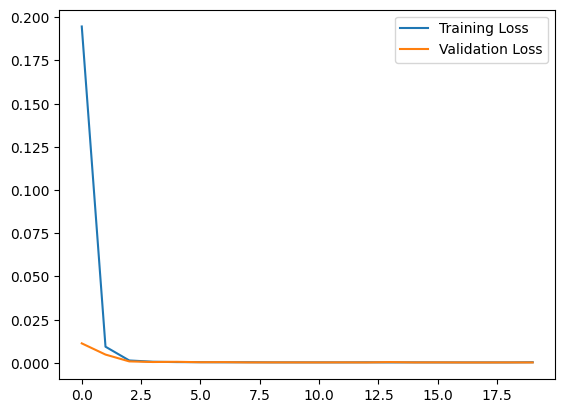

In [19]:
plt.plot(electron_history.history["loss"], label="Training Loss")
plt.plot(electron_history.history["val_loss"], label="Validation Loss")
plt.legend()

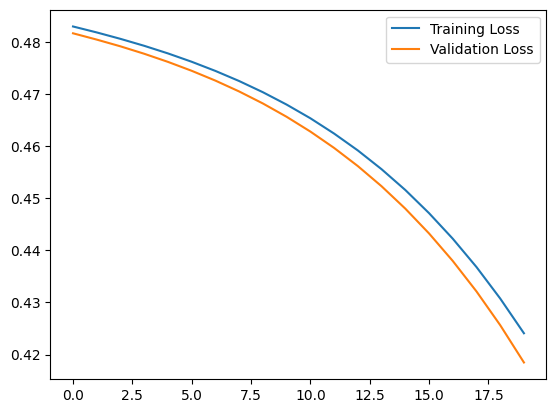

In [20]:
plt.plot(proton_history.history["loss"], label="Training Loss")
plt.plot(proton_history.history["val_loss"], label="Validation Loss")
plt.legend()

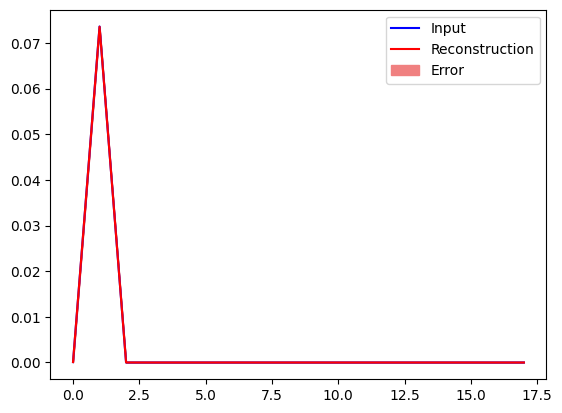

In [21]:
electron_encoded_data = autoencoder_electron.encoder(electron_normal_test_data).numpy()
electron_decoded_data = autoencoder_electron.decoder(electron_encoded_data).numpy()

plt.plot(electron_normal_test_data[0], 'b')
plt.plot(electron_decoded_data[0], 'r')
plt.fill_between(np.arange(18), electron_decoded_data[0], electron_normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

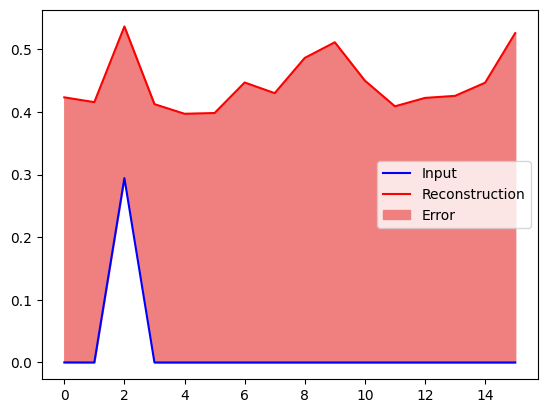

In [22]:
proton_encoded_data = autoencoder_proton.encoder(proton_normal_test_data).numpy()
proton_decoded_data = autoencoder_proton.decoder(proton_encoded_data).numpy()

plt.plot(proton_normal_test_data[0], 'b')
plt.plot(proton_decoded_data[0], 'r')
plt.fill_between(np.arange(16), proton_decoded_data[0], proton_normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

In [23]:
electron_encoded_data = autoencoder_electron.encoder(electron_anomalous_test_data).numpy()
electron_decoded_data = autoencoder_electron.decoder(electron_encoded_data).numpy()

plt.plot(electron_anomalous_test_data[0], 'b')
plt.plot(electron_decoded_data[0], 'r')
plt.fill_between(np.arange(18), electron_decoded_data[0], electron_anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 0 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

NameError: name 'proto_decoded_data' is not defined

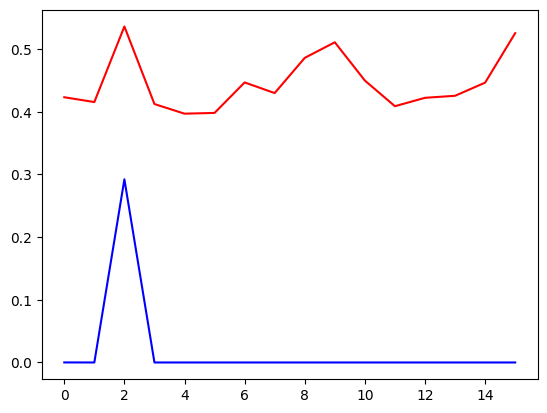

In [24]:
proton_encoded_data = autoencoder_proton.encoder(proton_anomalous_test_data).numpy()
proton_decoded_data = autoencoder_proton.decoder(proton_encoded_data).numpy()

plt.plot(proton_anomalous_test_data[0], 'b')
plt.plot(proton_decoded_data[0], 'r')
plt.fill_between(np.arange(16), proto_decoded_data[0], electron_anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

2500/2500 [==============================] - 3s 1ms/step


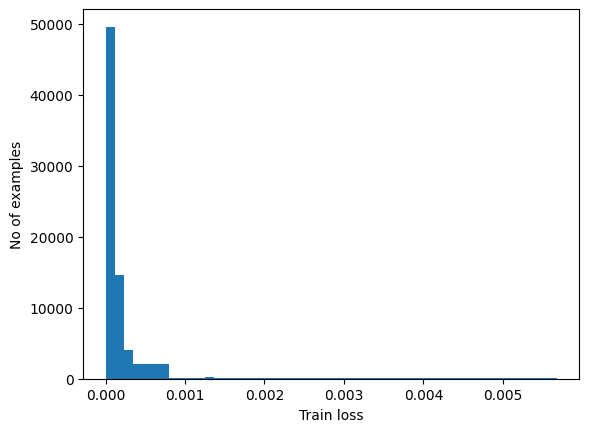

In [25]:
reconstructions_electron = autoencoder_electron.predict(electron_normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions_electron, electron_normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

28/28 [==============================] - 0s 1ms/step


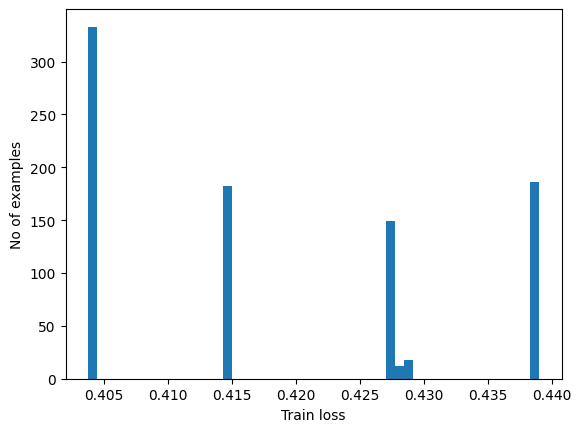

In [26]:
reconstructions_proton = autoencoder_proton.predict(proton_normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions_proton, proton_normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [27]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.43202922


In [28]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [29]:
preds_electron = predict(autoencoder_electron, electron_test_data, threshold)
print_stats(preds_electron, electron_test_labels)

Accuracy = 1.0
Precision = 1.0
Recall = 1.0


In [30]:
preds_proton = predict(autoencoder_proton, proton_test_data, threshold)
print_stats(preds_proton, proton_test_labels)

Accuracy = 0.25172572480441785
Precision = 0.05508100147275405
Recall = 0.8095238095238095


In [31]:
anomaly_inputs = ['E1', 'E2']

In [43]:
model_AE_electron = autoencoder_electron.fit(electron_normal_train_data, electron_normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(electron_test_data, electron_test_data),
          shuffle=True)

model_AE_proton = autoencoder_proton.fit(proton_normal_train_data, proton_normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(proton_test_data, proton_test_data),
          shuffle=True)

Epoch 1/20
157/157 [==============================] - 0s 3ms/step - loss: 2.5847e-04 - val_loss: 2.4335e-04
Epoch 2/20
157/157 [==============================] - 1s 4ms/step - loss: 2.6291e-04 - val_loss: 3.2238e-04
Epoch 3/20
157/157 [==============================] - 1s 3ms/step - loss: 2.9030e-04 - val_loss: 2.4391e-04
Epoch 4/20
157/157 [==============================] - 1s 3ms/step - loss: 2.7567e-04 - val_loss: 2.4386e-04
Epoch 5/20
157/157 [==============================] - 1s 3ms/step - loss: 2.8553e-04 - val_loss: 2.3602e-04
Epoch 6/20
157/157 [==============================] - 1s 3ms/step - loss: 2.6575e-04 - val_loss: 2.5519e-04
Epoch 7/20
157/157 [==============================] - 1s 3ms/step - loss: 2.8662e-04 - val_loss: 2.4507e-04
Epoch 8/20
157/157 [==============================] - 1s 3ms/step - loss: 2.6764e-04 - val_loss: 2.4761e-04
Epoch 9/20
157/157 [==============================] - 1s 4ms/step - loss: 2.5861e-04 - val_loss: 2.4378e-04
Epoch 10/20
157/157 [=======

In [44]:
electron_dataframe['anomaly_scores'] = model_AE_electron.decision_function(electron_dataframe[anomaly_inputs])

AttributeError: 'History' object has no attribute 'decision_function'

In [45]:
proton_dataframe['anomaly_scores'] = model_AE_proton.decision_function(proton_dataframe[anomaly_inputs])

AttributeError: 'History' object has no attribute 'decision_function'

In [48]:
electron_dataframe['anomaly'] = model_AE_electron.predict(electron_dataframe[anomaly_inputs])

AttributeError: 'History' object has no attribute 'predict'

In [47]:
proton_dataframe['anomaly'] = model_AE_proton.predict(proton_dataframe[anomaly_inputs])

AttributeError: 'History' object has no attribute 'predict'

In [53]:
def outlier_plot (data, outlier_method_name, x_var, y_var):
        
        print(f'Outlier Method: {outlier_method_name}')
        
        method = f'{outlier_method_name}_anomaly'
        
        print(f"number of anomalous values {len(data[data['anomaly'] == -1])}")
        print(f"number of non-anomalous values {len(data[data['anomaly'] == 1])}")
        print(f"number of values {len(data)}")
        
        g = sns.FacetGrid(data, col = 'anomaly', height = 4, hue = 'anomaly', hue_order = [1, -1])
        g.map(sns.scatterplot, x_var, y_var)
        g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y = 1.10, fontweight = 'bold')
        axes = g.axes.flatten()
        axes[0].set_title(f"Outliers \n {len(data[data['anomaly'] == -1])} points")
        axes[1].set_title(f"Outliers \n {len(data[data['anomaly'] == 1])} points")
        
        return g

In [51]:
outlier_plot(electron_dataframe, "Autoencoder", "E1", "E2")

Outlier Method: Autoencoder


KeyError: 'anomaly'

In [52]:
outlier_plot(proton_dataframe, "Autoencoder", "E1", "E2")

Outlier Method: Autoencoder


KeyError: 'anomaly'